## HCA

In [5]:
# import data
import pandas as pd
import numpy as np
df_glass = pd.read_csv(r"C:\Users\welcome\Desktop\Jupyter\glass.csv",index_col=0)
df_glass

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,,,,,,,,,
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [6]:
# get df info
print(df_glass.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 214 entries, 1.52101 to 1.51711
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Na      214 non-null    float64
 1   Mg      214 non-null    float64
 2   Al      214 non-null    float64
 3   Si      214 non-null    float64
 4   K       214 non-null    float64
 5   Ca      214 non-null    float64
 6   Ba      214 non-null    float64
 7   Fe      214 non-null    float64
 8   Type    214 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 16.7 KB
None


In [7]:
# shuffle df
from sklearn.utils import shuffle
df_shuffled = shuffle(df_glass, random_state=42)

In [8]:
# standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # instantiate scaler object
scaled_features = scaler.fit_transform(df_shuffled) # fit and transform df_shuffled

In [9]:
df_scaled_features=pd.DataFrame(scaled_features)
df_scaled_features

,0,1,2,3,4,5,6,7,8
0,-0.500618,0.636168,-0.170460,0.438787,0.112107,-0.392276,-0.352877,0.545111,-0.848275
1,1.586056,-1.865511,1.797009,0.814078,-0.763919,-0.004904,0.977618,-0.586451,2.010478
2,-0.439246,0.670914,-1.154195,-0.557675,-0.471910,0.628977,-0.352877,1.162326,-0.848275
3,1.770175,-1.865511,1.877314,0.814078,-0.763919,-0.138723,0.937300,0.339372,2.010478
4,0.383150,0.691761,0.732970,-0.764732,0.219689,-0.758518,-0.352877,-0.586451,-0.371816
...,...,...,...,...,...,...,...,...,...
209,-3.286943,-1.865511,1.315180,-3.676472,0.127475,3.058855,5.997210,2.293888,-0.371816
210,-0.979326,0.629219,-0.270841,0.827019,0.127475,-0.321844,-0.352877,-0.586451,-0.848275
211,-0.353324,0.504135,0.271217,0.788195,-0.656337,-0.399319,-0.352877,1.368065,-0.371816
212,0.837308,-0.343656,0.431826,0.024673,-0.763919,0.255692,-0.352877,-0.586451,1.534019


In [10]:
# create linkage model
from scipy.cluster.hierarchy import linkage 
model = linkage(scaled_features, method='complete')

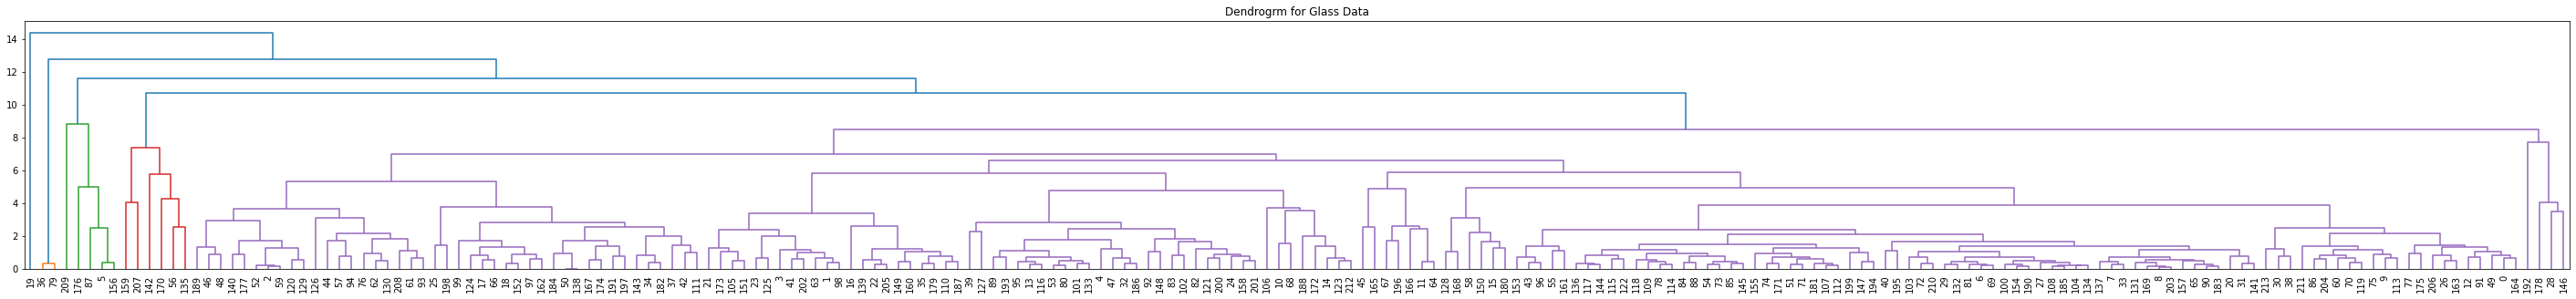

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(50,5))
plt.title('Dendrogrm for Glass Data')
dendrogram(model,leaf_rotation=90,leaf_font_size=10)
plt.show()

In [12]:
# predicted lables
from scipy.cluster.hierarchy import fcluster
labels=fcluster(model,t=9,criterion="distance")

In [13]:
# Add array as a Column in suffled Data
df_shuffled["predicted_cluster"]=labels
print(df_shuffled.head(10))

            Na    Mg    Al     Si     K     Ca    Ba    Fe  Type  \
RI                                                                 
1.51755  13.00  3.60  1.36  72.99  0.57   8.40  0.00  0.11     1   
1.51727  14.70  0.00  2.34  73.28  0.00   8.95  0.66  0.00     7   
1.52152  13.05  3.65  0.87  72.22  0.19   9.85  0.00  0.17     1   
1.51602  14.85  0.00  2.38  73.28  0.00   8.76  0.64  0.09     7   
1.51708  13.72  3.68  1.81  72.06  0.64   7.88  0.00  0.00     2   
1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2   
1.51761  12.81  3.54  1.23  73.24  0.58   8.39  0.00  0.00     1   
1.51569  13.24  3.49  1.47  73.25  0.38   8.03  0.00  0.00     2   
1.51590  13.02  3.58  1.51  73.12  0.69   7.96  0.00  0.00     2   
1.51660  12.99  3.18  1.23  72.97  0.58   8.81  0.00  0.24     2   

         predicted_cluster  
RI                          
1.51755                  4  
1.51727                  4  
1.52152                  4  
1.51602                  4  
1.51708  

<ipython-input-13-6a3107222ff8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shuffled["predicted_cluster"]=labels


In [14]:
from sklearn.cluster import AgglomerativeClustering
aggo_cluster=AgglomerativeClustering(n_clusters=7,affinity="manhattan",linkage="average")

In [15]:
aggo_cluster.fit_predict(df_glass)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4,
       0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## PCA- Can be used in both Supervised & UnSupervised Learning

In [16]:
from sklearn.decomposition import PCA
model=PCA()

In [17]:
model.fit(scaled_features)

PCA()

In [18]:
# Define pca estimator with number of reduce components
# HERE WE REDUCE THE FETURE
pca=PCA(n_components=5)

In [19]:
#fit the dta into PCA estimator
# HERE WE REDUCE THE FETURE from 9 to 5
pca.fit(scaled_features,labels)
print(pca.explained_variance_ratio_)

[0.32899888 0.17720982 0.15187324 0.12171836 0.09994581]


In [20]:
# print first pca component
first_pca=pca.components_[4]
print(first_pca)

[ 0.10387121  0.12623956  0.05291673  0.18902659 -0.27557372 -0.28564151
  0.23995583  0.84828497  0.00670663]


In [21]:
# transport the fitted Data using transform method
pca_reduced=pca.transform(scaled_features)

In [22]:
#view the reduce shape (lower dimension of feature from 15 to 10)
pca_reduced.shape

(214, 5)

In [23]:
scaled_features

array([[-0.50061837,  0.63616803, -0.17046023, ..., -0.35287683,
         0.54511092, -0.84827468],
       [ 1.58605628, -1.86551055,  1.79700922, ...,  0.97761765,
        -0.5864509 ,  2.01047778],
       [-0.43924559,  0.67091357, -1.15419496, ..., -0.35287683,
         1.16232646, -0.84827468],
       ...,
       [-0.35332369,  0.50413499,  0.27121658, ..., -0.35287683,
         1.36806497, -0.37181593],
       [ 0.83730832, -0.34365608,  0.43182633, ..., -0.35287683,
        -0.5864509 ,  1.53401903],
       [-0.96705153,  0.05244303, -1.23449983, ..., -0.35287683,
         1.47093423, -0.37181593]])

In [24]:
# first use KNN classifier method - import it from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# instantiate the knn estimator
knn = KNeighborsClassifier()

In [26]:
knn.fit(scaled_features,labels)

KNeighborsClassifier()

In [27]:
labels_predict=knn.predict(scaled_features)

In [30]:
labels_predict=knn.score(scaled_features,labels)
labels_predict

0.9672897196261683

In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(labels,labels_predict))

Accuracy: 0.9672897196261683


In [33]:
## Evaluate Model Performance
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(labels,labels_predict))
cm['Total']=np.sum(cm,axis=1)
cm=cm.append(np.sum(cm,axis=0),ignore_index=True)
cm.columns=["Predicted 1","Predicted 2","Predicted 3","Predicted 4","Predicted 5","Total"]
cm=cm.set_index([["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5","Total"]])
print(cm)

          Predicted 1  Predicted 2  Predicted 3  Predicted 4  Predicted 5  \
Actual 1            0            0            2            0            0   
Actual 2            0            4            0            1            0   
Actual 3            0            0            3            3            0   
Actual 4            0            0            0          200            0   
Actual 5            0            0            0            1            0   
Total               0            4            5          205            0   

          Total  
Actual 1      2  
Actual 2      5  
Actual 3      6  
Actual 4    200  
Actual 5      1  
Total       214  


## LDA- Cann't be use for Unlabeled data

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()

In [35]:
lda=LinearDiscriminantAnalysis(n_components=5)

In [36]:
#fit the dta into PCA estimator
# HERE WE REDUCE THE FETURE from 9 to 5
lda.fit(scaled_features,labels)
print(lda.explained_variance_ratio_)

[0.7732167  0.14028293 0.06114046 0.02535991]


C:\Users\welcome\anaconda32bit\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(9, 5 - 1) = 4 components.
  ChangedBehaviorWarning)
C:\Users\welcome\anaconda32bit\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


##### include Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [38]:
rfc=RandomForestClassifier(n_estimators=10)

In [39]:
#fit the dta into PCA estimator
# HERE WE REDUCE THE FETURE from 9 to 5
rfc.fit(scaled_features,labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Using Knn to find the Model Accuracy

In [40]:
# first use KNN classifier method - import it from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# instantiate the knn estimator
knn = KNeighborsClassifier()

In [42]:
knn.fit(scaled_features,labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
labels_predict=lda.predict(scaled_features)

In [44]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(labels,labels_predict))

Accuracy: 0.9906542056074766


In [45]:
## Evaluate Model Performance
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(labels,labels_predict))
cm['Total']=np.sum(cm,axis=1)
cm=cm.append(np.sum(cm,axis=0),ignore_index=True)
cm.columns=["Predicted 1","Predicted 2","Predicted 3","Predicted 4","Predicted 5","Total"]
cm=cm.set_index([["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5","Total"]])
print(cm)

          Predicted 1  Predicted 2  Predicted 3  Predicted 4  Predicted 5  \
Actual 1            2            0            0            0            0   
Actual 2            0            5            0            0            0   
Actual 3            0            0            6            0            0   
Actual 4            0            1            1          198            0   
Actual 5            0            0            0            0            1   
Total               2            6            7          198            1   

          Total  
Actual 1      2  
Actual 2      5  
Actual 3      6  
Actual 4    200  
Actual 5      1  
Total       214  
